# Scikit-learn の練習 2017.05.08-09

## digit データセットにSVMをかける

- [Scikit-learnのチュートリアル](http://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py)

を読んで数字の認識をSVMでやってみた。

(1797, 64)
[0 1 2 ..., 8 9 8]
(array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
       [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
       [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
       [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
       [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
       [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
       [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
       [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]]), 0)


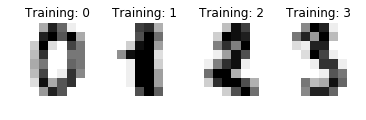

[  0.   0.   5.  13.   9.   1.   0.   0.   0.   0.  13.  15.  10.  15.   5.
   0.   0.   3.  15.   2.   0.  11.   8.   0.   0.   4.  12.   0.   0.   8.
   8.   0.   0.   5.   8.   0.   0.   9.   8.   0.   0.   4.  11.   0.   1.
  12.   7.   0.   0.   2.  14.   5.  10.  12.   0.   0.   0.   0.   6.  13.
  10.   0.   0.   0.]
0
<class 'numpy.ndarray'>
Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       1.00      0.99      0.99        88
          1       0.99      0.97      0.98        91
          2       0.99      0.99      0.99        86
          3       0.98      0.87      0.92        91
          4       0.99      0.96      0.97        92
          5       0.95      0.97      0.96        91
          6   

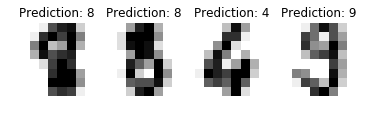

In [1]:
import matplotlib.pyplot as plt

# Scikit-learn からデータセット、SVM、 performance metricsを読み込む
from sklearn import datasets, svm, metrics

digits = datasets.load_digits() # 手書き数字のデータセットを読み込む
print(digits.data.shape) # 8x8 の画像が1797個
print(digits.target) #target はラベルの数字が入った形

# list は 他のデータ型からlistに変換する関数
# zip は並列に処理できるやつ
# list(zip())で組み合わせたリストをつくる
# digits.images で画像にした配列を取ってこれる
# digits.target でラベルを取ってこれる
images_and_labels = list(zip(digits.images, digits.target))

print(images_and_labels[0])

# 0番から3番までの画像を表示
for index, (image, label) in enumerate(images_and_labels[0:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

plt.show()

#lenは長さを取得する関数
num_samples = len(digits.images)
# 画像を学習機に入れるためにフラットな配列に変換
data = digits.images.reshape((num_samples, -1))
print(data[0])
print(digits.target[0])
print(type(data))

# SVMの分類機をつくる
classifier = svm.SVC(gamma=0.001)

#最初の半分を学習用に使う
classifier.fit(data[0:num_samples//2], digits.target[0:num_samples//2])

#テストを行う
expected = digits.target[num_samples//2:num_samples]
predicted = classifier.predict(data[num_samples//2:num_samples])

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

images_and_predictions = list(zip(digits.images[num_samples//2 : num_samples], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[0:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()



## MNIST の場合

- http://aidiary.hatenablog.com/entry/20140205/1391601418

を参考にやってみる。MNISTをダウンロードするメソッドが用意されている。  
Scikit-learn のオフィシャル情報はこっち

- http://scikit-learn.org/stable/datasets/#downloading-datasets-from-the-mldata-org-repository


25


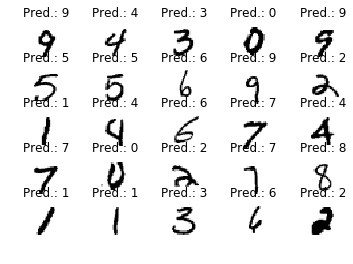

In [2]:
#とりあえず MNIST データをプロットするだけ

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics

# MNISTのデータをロード。初回はWebからダウンロードする。
mnist = datasets.fetch_mldata('MNIST original', data_home="./dataset")

#print(mnist.data)
#print(len(mnist.data)) #70000 サンプル
#print(len(mnist.data[0]))# 28x28 ピクセル
#print(mnist.data[0])
#print(mnist.data[0].reshape(28, 28))


# 0 から 70000 までの整数を25個取ってくる
#random_int = np.random.random_integers(0, len(mnist.data), 25) # deprecated
random_int = np.random.randint(0, len(mnist.data), 25)
print(len(random_int))

images_and_predictions = list(zip(mnist.data, mnist.target))

#for index, (image, prediction) in enumerate(images_and_predictions[0:4]):
for index in range(0, len(random_int)):
    plt.subplot(5, 5, index + 1)
    plt.axis('off')
    prediction = mnist.target[random_int[index]]
    image = mnist.data[random_int[index]]
    plt.imshow(image.reshape(28, 28), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Pred.: %i' % prediction)
plt.show()


## MNIST に SVM をかけてみる

色々試しているうちに汚くなった。


理由は不明だけど、行列の中身を255で割って0から1までにしてあげないとうまく動いてくれなかった。ここで1時間以上はまった。

- https://github.com/ksopyla/svm_mnist_digit_classification/blob/master/svm_mnist_classification.py

ここでやっていたのを参考にした。

`classifier.fit()` に入れるのは普通の Python のリストでも大丈夫だけど、NumPy の Array を使ったほうが `shape` とか `reshape` とかが使えるので便利。  

訓練データとテストデータはランダムに選んでるので、重複する可能性があるけど、今回は気にしてない。以下を見ると60000までが訓練用で以後がテスト用っぽい

- http://scikit-learn.org/stable/auto_examples/neural_networks/plot_mnist_filters.html



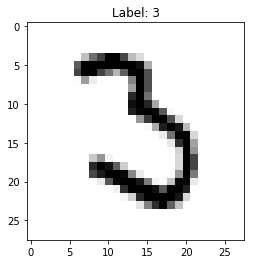

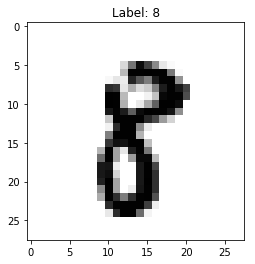

Start training.
End training.
Start test
End test
Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

        0.0       0.92      0.86      0.89       109
        1.0       0.67      1.00      0.80       117
        2.0       0.64      0.74      0.69       107
        3.0       0.58      0.84      0.68       111
        4.0       0.50      0.01      0.02        93
        5.0       0.85      0.12      0.20        95
        6.0       1.00      0.45      0.62        96
        7.0       0.83      0.80      0.81       110
        8.0       0.80      0.54      0.65        68
        9.0       0.34      0.83      0.48        94

avg / total       0.71      0.64      0.60      1000


Confusion matrix:
[[ 94   1   3   4   0   2   0 

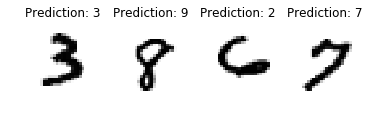

In [3]:
# MNIST に SVM をかける

#とりあえず MNIST データをプロットするだけ

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics

# MNISTのデータをロード。初回はWebからダウンロードする。
mnist = datasets.fetch_mldata('MNIST original', data_home="./dataset")

num_samples = len(mnist.data)
data = mnist.data.reshape((num_samples, -1))
num_train = 500
num_test = 1000

random_train = np.random.randint(0, len(mnist.data), num_train)
random_test = np.random.randint(0, len(mnist.data), num_test)

scale_factor = 255.0 # 配列の要素をスケールする因子

# 訓練用データとラベルをつめる
data_train = list()
target_train = list()
for i in range(0, num_train):
        index = random_train[i]
        data_train.append(data[index]/scale_factor)
        target_train.append(mnist.target[index])
data_train_array = np.array(data_train)
target_train_array = np.array(target_train)
data_train_array.reshape((num_train, -1))

#print(type(data_train_array))
#print(data_train_array.shape)
#print(target_train_array.shape)
#print(data_train[0])
#print(target_train[0])

#訓練用データとラベルの図示
plt.imshow(data_train[0].reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')
plt.title('Label: %i' % target_train[0])
plt.show()

plt.imshow(data_train[1].reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')
plt.title('Label: %i' % target_train[1])
plt.show()


# テスト用データとラベルをつめる
data_test = []
target_test = []
for i in range(0, num_test):
        index = random_test[i]
        data_test.append(data[index]/scale_factor)
        target_test.append(mnist.target[index])
data_test_array = np.array(data_test)
target_test_array = np.array(target_test)
data_test_array.reshape((num_test), -1)


# SVMの分類機をつくる
classifier = svm.SVC(gamma=0.001)


#訓練を行う
print("Start training.")
#classifier.fit(data_train_array, target_train_array)
classifier.fit(data_train, target_train)
print("End training.")

#テストを行う
print("Start test")
#predicted = classifier.predict(data_test_array)
predicted = classifier.predict(data_test)
print("End test")

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(target_test_array, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(target_test_array, predicted))

images_and_predictions = list(zip(data_test_array, predicted))
for index, (image, prediction) in enumerate(images_and_predictions[0:4]):
    plt.subplot(2, 4, index+1) #行数、列数、何番目のプロットか
    plt.axis('off')
    plt.imshow(image.reshape(28, 28), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)
    
plt.show()


### 上記結果のまとめ

テスト数を1000に固定して、訓練数を変えて正解率を求めてみた。

実行時間は訓練数10000で1分くらいな感じ？

文字別では5の正解率が低く、0と7が高い。


```
100 0.21
500 0.78
1000 0.85
2000 0.87
10000 0.90
70000 0.93
```

これをプロットすると

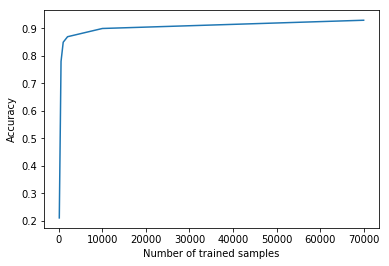

In [4]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array([100, 500, 1000, 2000, 10000, 70000])
y = np.array([0.21, 0.78, 0.85, 0.87, 0.90, 0.93])

#plt.scatter(x, y)
plt.plot(x, y)
plt.xlabel('Number of trained samples')
plt.ylabel('Accuracy')
plt.show()

## 同じことをニューラルネットでやる

Scikit-learn の MLP の説明はここ。

- http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier

ソルバーは SGD の結果が良い気がする。ADAMは層が深いと良い結果になる気がする。浅いときにAdamを使うときは学習率の初期値を小さくする。例えば 0.001 とか。参照したサンプルでは0.1となっていだけど、これだとAdamはさっさとローカルミニマムをみつけてしまって終わってしまう。（逆に小さすぎても収束が遅くなる。）

Iteration 1, loss = 2.29160062
Iteration 2, loss = 2.15301945
Iteration 3, loss = 1.92983909
Iteration 4, loss = 1.66220406
Iteration 5, loss = 1.38728483
Iteration 6, loss = 1.20716478
Iteration 7, loss = 1.08752182
Iteration 8, loss = 0.97847569
Iteration 9, loss = 0.87291754
Iteration 10, loss = 0.76898699
Iteration 11, loss = 0.66640923
Iteration 12, loss = 0.56464483
Iteration 13, loss = 0.47918081
Iteration 14, loss = 0.41961302
Iteration 15, loss = 0.37962261
Iteration 16, loss = 0.35094742
Iteration 17, loss = 0.32852714
Iteration 18, loss = 0.31005017
Iteration 19, loss = 0.29322977
Iteration 20, loss = 0.27935754
Iteration 21, loss = 0.26707597
Iteration 22, loss = 0.25655668
Iteration 23, loss = 0.24647924
Iteration 24, loss = 0.23850452
Iteration 25, loss = 0.23041111
Iteration 26, loss = 0.22238460
Iteration 27, loss = 0.21626719
Iteration 28, loss = 0.20919166
Iteration 29, loss = 0.20299702
Iteration 30, loss = 0.19762060
Iteration 31, loss = 0.19189996
Iteration 32, los

/Users/naoya/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training set score: 0.967333
Test set score: 0.936900


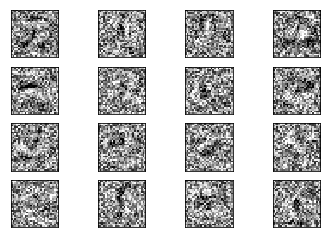

In [5]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_mldata
from sklearn.neural_network import MLPClassifier

mnist = fetch_mldata("MNIST original",  data_home="./dataset")
# rescale the data, use the traditional train/test split
data, target = mnist.data / 255., mnist.target
data_train, data_test = data[:60000], data[60000:]
target_train, target_test = target[:60000], target[60000:]

#デフォルトその1 10分以上かかる
#mlp = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=400, alpha=1e-4,
#                     solver='sgd', verbose=10, tol=1e-4, random_state=1)
#デフォルトその2
#mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, alpha=1e-4,
#                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
#                    learning_rate_init=.1)
mlp = MLPClassifier(hidden_layer_sizes=(50,10,10,10,10,10,10), max_iter=50, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=0.001)

#hidden_layer_sizes (n1, n2, ...) : The ith element represents the number of neurons in the ith hidden layer.
# activation: {‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default ‘relu’
# solver : {‘lbfgs’, ‘sgd’, ‘adam’}, default ‘adam’
#alpha : float, optional, default 0.0001 L2 penalty (regularization term) parameter
# batch_size : int, optional, default ‘auto’
#Size of minibatches for stochastic optimizers. If the solver is ‘lbfgs’, the classifier will not use minibatch. When set to “auto”, batch_size=min(200, n_samples)
#learning_rate : {‘constant’, ‘invscaling’, ‘adaptive’}, default ‘constant’


mlp.fit(data_train, target_train)
print("Training set score: %f" % mlp.score(data_train, target_train))
print("Test set score: %f" % mlp.score(data_test, target_test))

fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

### MNIST by MLP の結果

#### ハイパーパラメータ

以下のような条件で SGD と Adam を試した

- 学習サンプル数 60000
- テストサンプル数 10000
- 隠れ層 (50,10,10,10,10,10,10)
- 最大イタレーション数 50
- 活性化関数 ReLU (デフォルト)
- alpha(L2 penalty parameter) 1e-4
- tolerance = 1e-4 (損失関数がこれ以上よくならなかったら学習終了)
- random_state=1
- 学習率の初期値 0.001

損失関数は自分で決められない？

#### 結果

- Adam
    - Training set score: 0.993417
    - Test set score: 0.962600
- SGD (未収束)
    - Training set score: 0.967333
    - Test set score: 0.936900
    
損失関数の変化を以下に示す。

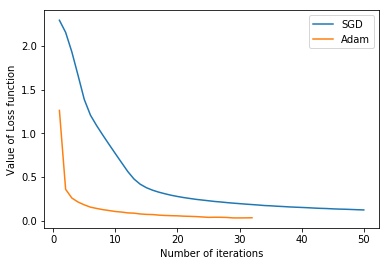

In [6]:
import matplotlib.pyplot as plt

# Read Adam result
fin = open("data/loss_adam.dat", "rt")
lines = fin.readlines()
fin.close()

x_adam = list()
y_adam = list()

for line in lines:
    block = line.rstrip().split(' ')
    x_adam.append(float(block[0]))
    y_adam.append(float(block[1]))

# Read SGD result
fin = open("data/loss_sgd.dat", "rt")
lines = fin.readlines()
fin.close()

x_sgd = list()
y_sgd = list()

for line in lines:
    block = line.rstrip().split(' ')
    x_sgd.append(float(block[0]))
    y_sgd.append(float(block[1]))
    
#plt.scatter(x, y)
plt.plot(x_sgd, y_sgd, label="SGD")
plt.plot(x_adam, y_adam, label="Adam")
plt.xlabel('Number of iterations')
plt.ylabel('Value of Loss function')
plt.legend()
plt.show()

## AdaBoost でもやってみる

弱識別器は小さな決定木のようなものを使ってると以下のユーザーガイドに書いてあった。

- ユーザーガイド http://scikit-learn.org/stable/modules/ensemble.html#adaboost

### ハイパーパラメター

オフィシャル情報はここ

- http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

- base_estimator : object, optional (default=DecisionTreeClassifier)
- n_estimators : integer, optional (default=50)
- learning_rate : float, optional (default=1.)
- algorithm : {‘SAMME’, ‘SAMME.R’}, optional (default=’SAMME.R’)
- random_state : int, RandomState instance or None, optional (default=None)

n_estimater を増やすと時間がかかるが結果が良くなった？
learning_rate と n_estimater はトレードオフと書いてある。

デフォルト 60000 サンプルで 50 estimaters だと 70% くらい。

In [7]:
import random
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_mldata
from sklearn.ensemble import AdaBoostClassifier

mnist = fetch_mldata("MNIST original",  data_home="./dataset")
# rescale the data, use the traditional train/test split
data, target = mnist.data / 255., mnist.target
data_train, data_test = data[:60000], data[60000:] # デフォルトパラメターで5分くらい、メモリ1GBくらい
target_train, target_test = target[:60000], target[60000:]

#学習サンプルを減らす
train_list = list(zip(data_train, target_train))
reduced_train_list = random.sample(train_list, 60000) ## 指定した数だけランダムに取り出す。numpy.randomではない。
data_train_reduced, target_train_reduced = zip(*reduced_train_list) 


adaboost = AdaBoostClassifier(n_estimators = 100, learning_rate = 1.0) 

#adaboost.fit(data_train, target_train)
adaboost.fit(data_train_reduced, target_train_reduced)


#print("Training set score: %f" % adaboost.score(data_train, target_train))
print("Training set score: %f" % adaboost.score(data_train_reduced, target_train_reduced))
#print("Test set score: %f" % adaboost.score(data_test, target_test))

Training set score: 0.732367
